# Predicting Houses Damaged based on data from typhoons: 

* Melor 12. 2015
* Hagupit 11/12. 2014
* Rammasun 07.2014
* Haiyan 11. 2013


In [2]:
%pylab inline
import pandas as pd
import numpy as np
import cPickle
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import  cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from IPython.display import Image  

Populating the interactive namespace from numpy and matplotlib


In [3]:
T = pd.read_csv("../4 typhoons/matrix_4typhoons.csv")
T.index = T['M_Code']
OriginalT = T

In [4]:
T.head(5)


,Unnamed: 0,M_Code,Municipality,Area (km2),Population 2010 census,Population 2015 census,Pop. Density 2015 per km2,Poverty (%),Rainfallme,Houses damaged,average_speed_mph,distance_typhoon_km,typhoon_name
M_Code,,,,,,,,,,,,,
PH054120000,1,PH054120000,SAN PASCUAL,256.250,NaN,46674,182.142439,8.617217,256.035653,185,89.238502,45.665419,Rammasun
PH084802000,21,PH084802000,BIRI,26.012,NaN,11767,452.368138,8.447353,237.600006,707,80.000000,45.704026,Rammasun
PH051702000,36,PH051702000,BALATAN,57.938,NaN,30922,533.708447,7.124377,230.068702,2130,124.913104,7.148324,Rammasun
PH051706000,44,PH051706000,BULA,164.574,NaN,69430,421.877089,5.572519,227.051289,6,135.586192,4.341025,Rammasun
PH051705000,56,PH051705000,BUHI,187.748,NaN,77143,410.885868,6.437395,224.025261,38,134.373717,9.510381,Rammasun


## Exploration of data (missing data wrt houses damaged, poeple affected)

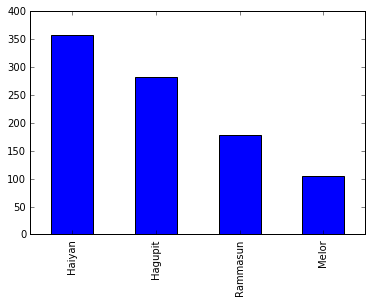

In [5]:
T.typhoon_name.value_counts().plot(kind='bar')


In [6]:
T.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,924,453.458874,271.438996,1.000000,289.000000,422.500000,580.000000,1546.000000
Area (km2),924,155.774934,159.301424,1.610000,63.556675,115.241850,198.327175,2204.119900
Population 2010 census,357,41702.885154,45973.449556,4058.000000,19101.000000,31052.000000,47357.000000,511820.000000
Population 2015 census,924,50593.443723,65378.845418,4034.000000,20631.750000,34202.500000,56043.500000,776386.000000
Pop. Density 2015 per km2,924,614.797580,1820.456409,17.772679,182.080893,292.259084,474.203560,39652.173910
Poverty (%),917,12.521384,12.738553,0.425403,4.952015,7.529456,10.399815,59.200000
Rainfallme,924,264.403698,151.132737,0.000000,146.151993,240.000000,351.107788,794.131101
Houses damaged,924,2071.814935,3060.252058,0.000000,51.000000,706.500000,2962.750000,20198.000000
average_speed_mph,924,85.081379,48.721775,0.000000,50.000000,70.000000,110.000000,190.000000
distance_typhoon_km,924,71.746498,61.292821,0.117668,27.855118,56.252820,97.436222,447.567504


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11335f810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116a9f7d0>]], dtype=object)

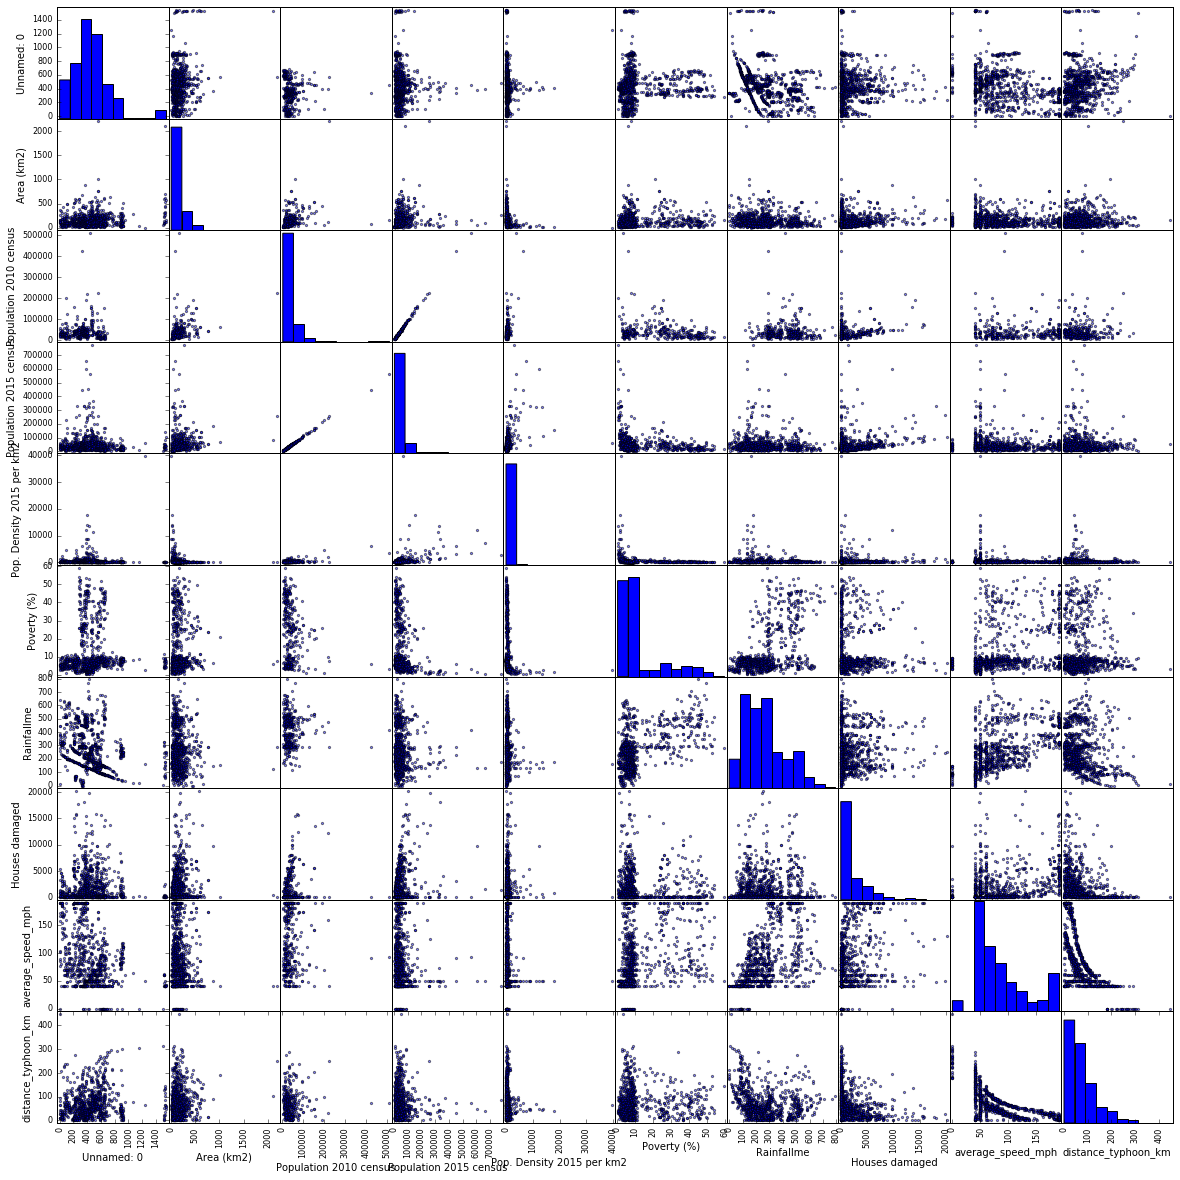

In [13]:
scatter_matrix(T, figsize=(20,20))

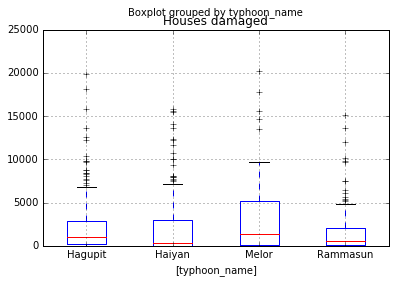

In [119]:
T[['Houses damaged',   'typhoon_name']].boxplot(by='typhoon_name')

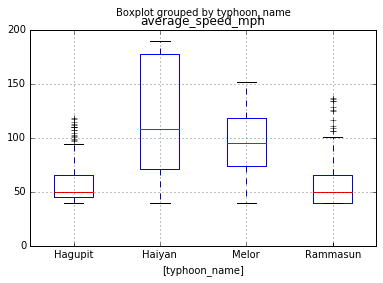

In [118]:
T[['average_speed_mph', 'typhoon_name']].boxplot(by='typhoon_name')

### Houses damaged per municipality depending on typhoon

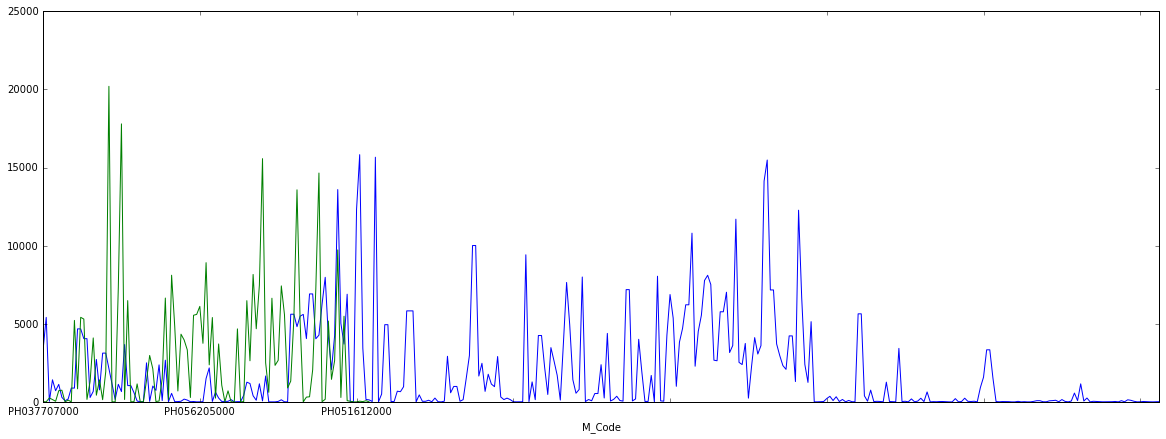

In [173]:
hd = pd.DataFrame(T[u'M_Code'])
hd.index = hd['M_Code']
del hd['M_Code']
haiyan = T.loc[T['typhoon_name'] == 'Haiyan']['Houses damaged']
# hagupit = T.loc[T['typhoon_name'] == 'Hagupit']['Houses damaged']
# rammasun = T.loc[T['typhoon_name'] == 'Rammasun']['Houses damaged']
melor = T.loc[T['typhoon_name'] == 'Melor']['Houses damaged']
haiyan.plot()
melor.plot(figsize=(20,7))
# rammasun.plot()
# hagupit.plot(figsize=(20,7))

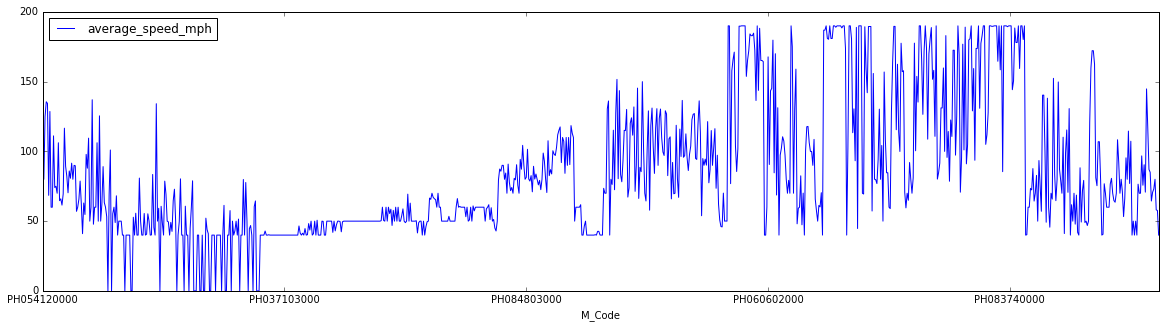

In [99]:
T[['average_speed_mph']].plot(figsize=(20,5))

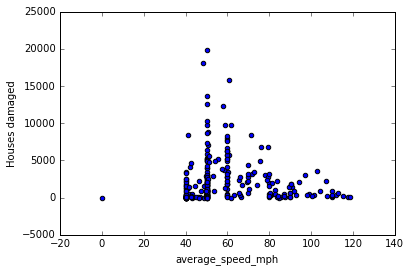

In [103]:
T.loc[T['typhoon_name'] == 'Hagupit'].plot(kind='scatter', x='average_speed_mph', y = 'Houses damaged')

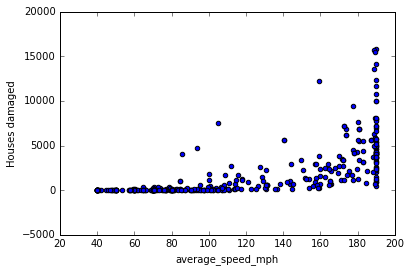

In [104]:
T.loc[T['typhoon_name'] == 'Haiyan'].plot(kind='scatter', x='average_speed_mph', y = 'Houses damaged')

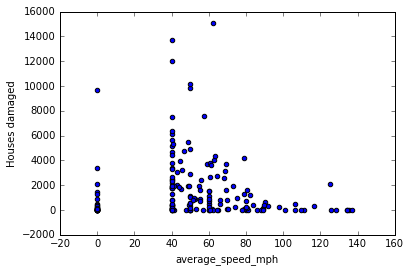

In [105]:
T.loc[T['typhoon_name'] == 'Rammasun'].plot(kind='scatter', x='average_speed_mph', y = 'Houses damaged')

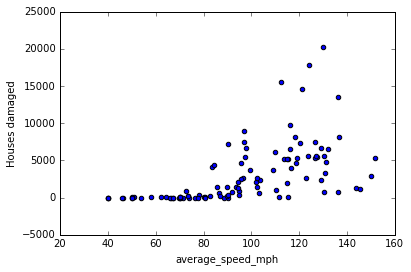

In [106]:
T.loc[T['typhoon_name'] == 'Melor'].plot(kind='scatter', x='average_speed_mph', y = 'Houses damaged')

In [107]:
T.columns

Index([u'M_Code', u'Municipality', u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',
       u'Houses damaged', u'average_speed_mph', u'distance_typhoon_km',
       u'typhoon_name', u'Poor'],
      dtype='object')

In [113]:
T['percentage_of_damaged'] = T['Houses damaged']/ (T['Population 2015 census'] / 6 ) * 100


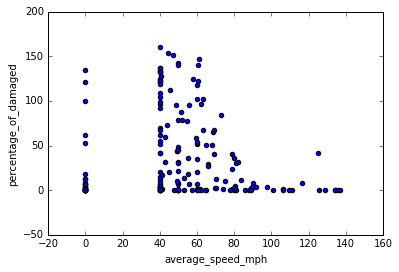

In [158]:
T.loc[T['typhoon_name'] == 'Rammasun'].plot(kind='scatter', y = 'percentage_of_damaged', x='average_speed_mph')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bcd2d50>]], dtype=object)

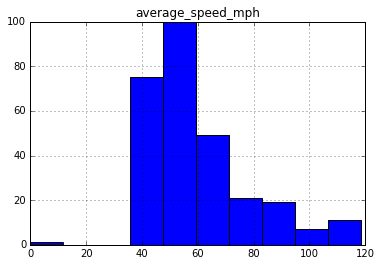

In [97]:
T.loc[T['typhoon_name'] == 'Hagupit'][[ 'average_speed_mph']].hist()

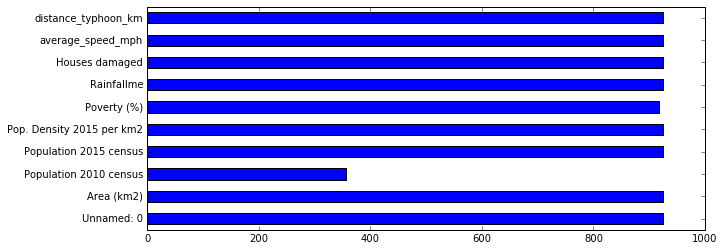

In [32]:
T[pd.notnull(T['Houses damaged'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,4))

In [33]:
H = T.loc[T['typhoon_name'] == 'Haiyan']

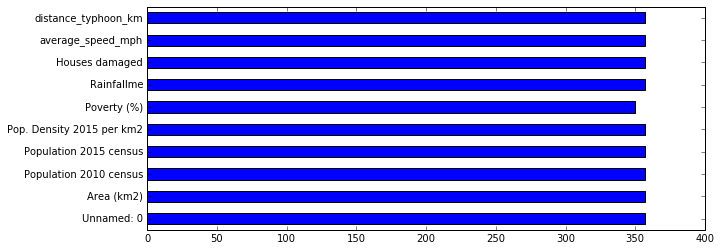

In [34]:
H[pd.notnull(H['Houses damaged'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,4))

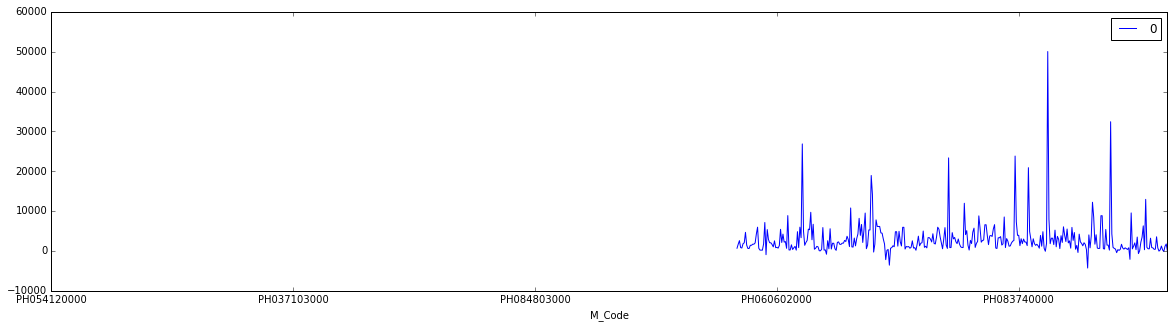

In [43]:
pd.DataFrame(T['Population 2015 census'] - T['Population 2010 census']).plot(figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b42d910>]], dtype=object)

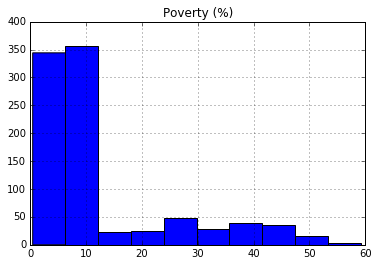

In [53]:
T[['Poverty (%)']].hist(bins=10)

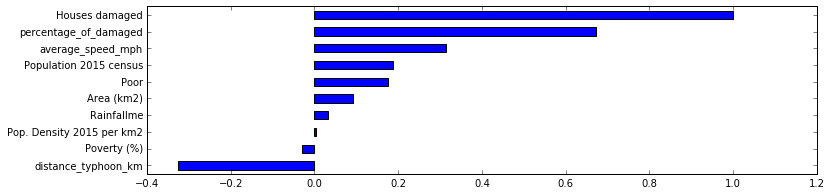

In [159]:
T.corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

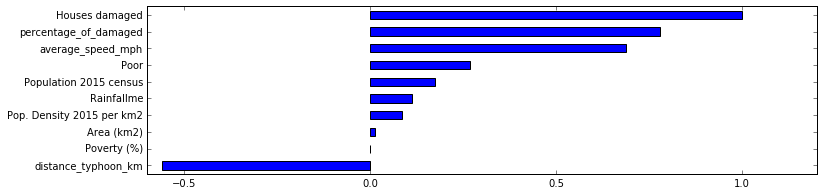

In [160]:
T.loc[T['typhoon_name'] == 'Haiyan'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

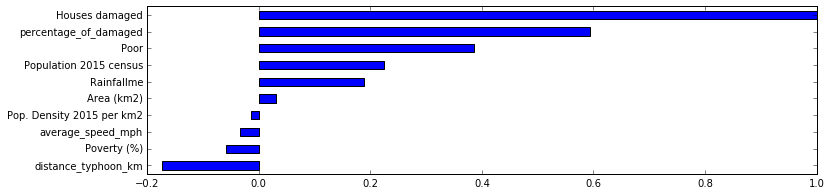

In [161]:
T.loc[T['typhoon_name'] == 'Hagupit'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

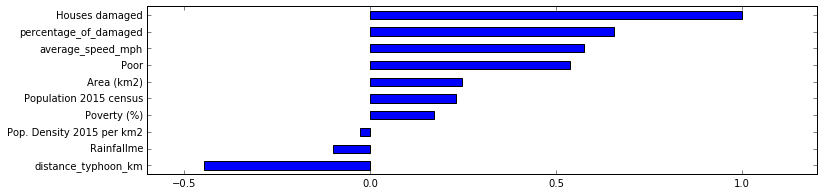

In [162]:
T.loc[T['typhoon_name'] == 'Melor'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

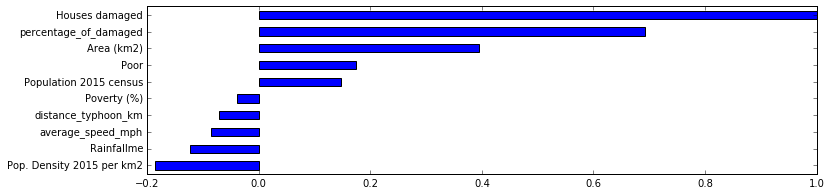

In [163]:
T.loc[T['typhoon_name'] == 'Rammasun'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

## 0. Data preparation
* Deleting Unnamed: 0 column
* Ignoring Census 2010 data
* Filling poverty data with mean
* Adding estimated poor counts


In [7]:
del T['Unnamed: 0']

In [8]:
del T['Population 2010 census']

In [9]:
T[['Poverty (%)']] = T[['Poverty (%)']].fillna(T[['Poverty (%)']].mean())

In [10]:
T['Poor'] = T['Poverty (%)'] * T['Population 2015 census']

## 1. Training the model on Hayan data, evaluating on the rest

In [11]:
T.columns

Index([u'M_Code', u'Municipality', u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',
       u'Houses damaged', u'average_speed_mph', u'distance_typhoon_km',
       u'typhoon_name', u'Poor'],
      dtype='object')

In [12]:
X1_train = T.loc[T['typhoon_name'] == 'Haiyan'][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', u'Poor']]

y1_train = T.loc[T['typhoon_name'] == 'Haiyan']['Houses damaged']

X1_test = T.loc[T['typhoon_name'] != 'Haiyan'][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', u'Poor']]
y1_test = T.loc[T['typhoon_name'] != 'Haiyan']['Houses damaged']

rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X1_train, y1_train)
print CV_rf.best_params_


{'max_features': 'log2', 'n_estimators': 20, 'min_samples_leaf': 20}


In [13]:
rf = RandomForestRegressor(max_features= 'auto', n_estimators= 10, min_samples_leaf= 20)

predicted1_train_rf = cross_validation.cross_val_predict(rf, X1_train, y1_train, cv=10)

print 'Cross validation MAE: ', mean_absolute_error(y1_train, predicted1_train_rf)
print 'Cross validation R2: ', r2_score(y1_train, predicted1_train_rf)

rf.fit(X1_train, y1_train )

predicted1_train_rf = rf.predict(X1_train)
print 'Training data MAE: ', mean_absolute_error(y1_train, predicted1_train_rf)
print 'Training data R2: ', r2_score(y1_train, predicted1_train_rf)
predicted1_test = rf.predict(X1_test)
print 'MAE on other typhoons: ', mean_absolute_error(y1_test, predicted1_test)
print 'R2 on other typhoons: ', r2_score(y1_test, predicted1_test)


Cross validation MAE:  974.040800226
Cross validation R2:  0.608040302675
Training data MAE:  765.093259533
Training data R2:  0.745568209211
MAE on other typhoons:  1935.14988976
R2 on other typhoons:  -0.158840911596


## 2. Training the model on 2 oldest typhoons, evaluating on the rest

In [81]:
X2_train = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun' ])][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', u'Poor']]


y2_train = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun'])]['Houses damaged']

X2_test = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun' ]) == False][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', u'Poor']]
y2_test = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun' ]) == False]['Houses damaged']

print "Training shapes: ", X2_train.shape, y2_train.shape
print "Testing shapes: ", X2_test.shape, y2_test.shape
                 
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X2_train, y2_train)
print CV_rf.best_params_

Training shapes:  (536, 8) (536,)
Testing shapes:  (388, 8) (388,)
{'max_features': 'auto', 'n_estimators': 20, 'min_samples_leaf': 20}


In [84]:
rf = RandomForestRegressor(max_features= 'auto', n_estimators= 20, min_samples_leaf= 20)

predicted2_train_rf = cross_validation.cross_val_predict(rf, X2_train, y2_train, cv=10)

print 'Cross validation MAE: ', mean_absolute_error(y2_train, predicted2_train_rf)
print 'Cross validation R2: ', r2_score(y2_train, predicted2_train_rf)

rf.fit(X2_train, y2_train )

predicted2_train_rf = rf.predict(X2_train)
print 'Training data MAE: ', mean_absolute_error(y2_train, predicted2_train_rf)
print 'Training data R2: ', r2_score(y2_train, predicted2_train_rf)
predicted2_test = rf.predict(X2_test)
print 'MAE on other typhoons: ', mean_absolute_error(y2_test, predicted2_test)
print 'R2 on other typhoons: ', r2_score(y2_test, predicted2_test)

 Cross validation MAE:  1248.80917859
Cross validation R2:  0.424885300156
Training data MAE:  965.782542558
Training data R2:  0.626710116553
MAE on other typhoons:  2273.94504511
R2 on other typhoons:  -0.174399340433


## 3. Training the model on 3 oldest typhoon, evaluating on the rest

In [88]:
X3_train = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun', 'Hagupit'])][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km']]


y3_train = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun', 'Hagupit'])]['Houses damaged']

X3_test = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun', 'Hagupit' ]) == False][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km']]
y3_test = T.loc[T['typhoon_name'].isin(['Haiyan', 'Rammasun', 'Hagupit' ]) == False]['Houses damaged']

print "Training shapes: ", X3_train.shape, y3_train.shape
print "Testing shapes: ", X3_test.shape, y3_test.shape
                 
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X3_train, y3_train)
print CV_rf.best_params_

Training shapes:  (819, 7) (819,)
Testing shapes:  (105, 7) (105,)
{'max_features': 'log2', 'n_estimators': 100, 'min_samples_leaf': 5}


In [177]:
rf = RandomForestRegressor(max_features= 'log2', n_estimators= 200, min_samples_leaf= 5)

predicted3_train_rf = cross_validation.cross_val_predict(rf, X3_train, y3_train, cv=10)

print 'Cross validation MAE: ', mean_absolute_error(y3_train, predicted3_train_rf)
print 'Cross validation R2: ', r2_score(y3_train, predicted3_train_rf)

rf.fit(X3_train, y3_train )

predicted3_train_rf = rf.predict(X3_train)
print 'Training data MAE: ', mean_absolute_error(y3_train, predicted3_train_rf)
print 'Training data R2: ', r2_score(y3_train, predicted3_train_rf)
predicted3_test = rf.predict(X3_test)
print 'MAE on other typhoons: ', mean_absolute_error(y3_test, predicted3_test)
print 'R2 on other typhoons: ', r2_score(y3_test, predicted3_test)

Cross validation MAE:  1549.58739411
Cross validation R2:  0.342066365074
Training data MAE:  929.52129953
Training data R2:  0.710579505233
MAE on other typhoons:  2974.23289161
R2 on other typhoons:  -0.108955482936


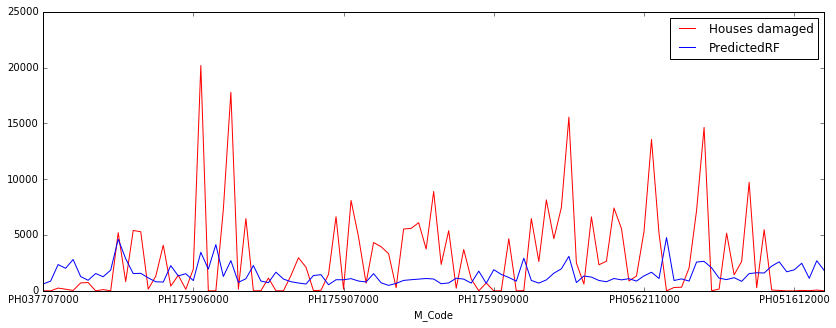

In [91]:
outcome = pd.DataFrame({'Houses damaged': y3_test, 'PredictedRF': predicted3_test})
outcome.plot(figsize=(14, 5), color=['red', 'blue', 'darkgreen'])

## 4. Training on Haiyan, testing on Melor

In [25]:
X4_train = T.loc[T['typhoon_name'].isin(['Haiyan'])][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', 'Poor']]


y4_train = T.loc[T['typhoon_name'].isin(['Haiyan'])]['Houses damaged']

X4_test = T.loc[T['typhoon_name'].isin(['Melor' ])][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', 'Poor']]
y4_test = T.loc[T['typhoon_name'].isin(['Melor' ]) ]['Houses damaged']

print "Training shapes: ", X4_train.shape, y4_train.shape
print "Testing shapes: ", X4_test.shape, y4_test.shape
                 
# rf = RandomForestRegressor(n_estimators=200)
# param_grid = { 
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'], 
#     'min_samples_leaf': [5, 10, 20]
# }
# CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
# CV_rf.fit(X4_train, y4_train)
# print CV_rf.best_params_

Training shapes:  (357, 8) (357,)
Testing shapes:  (105, 8) (105,)


In [26]:
rf = RandomForestRegressor(max_features= 'log2', n_estimators= 100, min_samples_leaf= 10)

predicted4_train_rf = cross_validation.cross_val_predict(rf, X4_train, y4_train, cv=10)

print 'Cross validation MAE: ', mean_absolute_error(y4_train, predicted4_train_rf)
print 'Cross validation R2: ', r2_score(y4_train, predicted4_train_rf)

rf.fit(X4_train, y4_train )

predicted4_train_rf = rf.predict(X4_train)
print 'Training data MAE: ', mean_absolute_error(y4_train, predicted4_train_rf)
print 'Training data R2: ', r2_score(y4_train, predicted4_train_rf)
predicted4_test = rf.predict(X4_test)
print 'MAE on other typhoons: ', mean_absolute_error(y4_test, predicted4_test)
print 'R2 on other typhoons: ', r2_score(y4_test, predicted4_test)

Cross validation MAE:  965.076607833
Cross validation R2:  0.63289158685
Training data MAE:  684.678192263
Training data R2:  0.809552911015
MAE on other typhoons:  2088.17569617
R2 on other typhoons:  0.213729101297


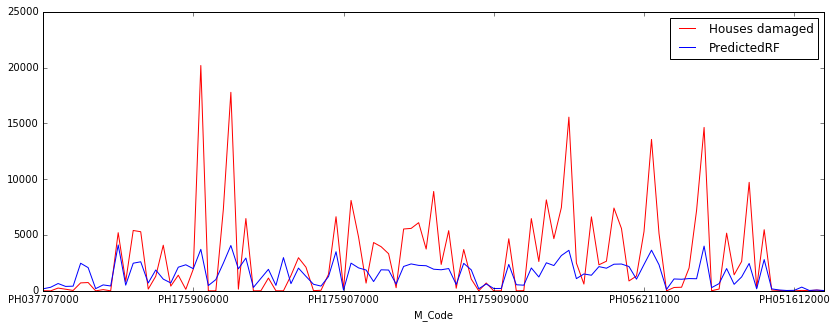

In [183]:
outcome = pd.DataFrame({'Houses damaged': y4_test, 'PredictedRF': predicted4_test})
outcome.plot(figsize=(14, 5), color=['red', 'blue', 'darkgreen'])

## 5th model trained on Hayian and Melor, can be used for prediction for the coming typhoon

In [185]:
X5_train = T.loc[T['typhoon_name'].isin(['Haiyan', 'Melor'])][[u'Area (km2)', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',  u'average_speed_mph', u'distance_typhoon_km', 'Poor']]


y5_train = T.loc[T['typhoon_name'].isin(['Haiyan', 'Melor'])]['Houses damaged']


print "Training shapes: ", X5_train.shape, y5_train.shape
                 
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X5_train, y5_train)
print CV_rf.best_params_

Training shapes:  (462, 8) (462,)
{'max_features': 'auto', 'n_estimators': 50, 'min_samples_leaf': 10}


In [186]:
rf = RandomForestRegressor(max_features= 'log2', n_estimators= 100, min_samples_leaf= 10)

predicted5_train_rf = cross_validation.cross_val_predict(rf, X5_train, y5_train, cv=10)

print 'Cross validation MAE: ', mean_absolute_error(y5_train, predicted5_train_rf)
print 'Cross validation R2: ', r2_score(y5_train, predicted5_train_rf)

rf.fit(X5_train, y5_train )

predicted5_train_rf = rf.predict(X5_train)
print 'Training data MAE: ', mean_absolute_error(y5_train, predicted5_train_rf)
print 'Training data R2: ', r2_score(y5_train, predicted5_train_rf)

Cross validation MAE:  1081.24555889
Cross validation R2:  0.669277099699
Training data MAE:  786.244847856
Training data R2:  0.807833321741


## 6. Saving the model 

In [190]:
with open('modelHayianMelor', 'wb') as f:
    cPickle.dump(rf, f)


# Using for prediction saved model                                                                                                                                                                                                        

with open('modelHayianMelor', 'rb') as f:
    rf = cPickle.load(f)
    
    predicted5_train_rf = rf.predict(X5_train)
    print 'Training data MAE: ', mean_absolute_error(y5_train, predicted5_train_rf)
    print 'Training data R2: ', r2_score(y5_train, predicted5_train_rf)




Training data MAE:  786.244847856
Training data R2:  0.807833321741
